# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import json


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


591

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Get the Weather data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()

#print(json.dumps(weather_json, indent=4))
#print(requests.get(query_url+city))

# Set Up Lists to Hold Reponse Info
city_name = []
latitude= []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Processing Record Counter Starting a 1
processing_record = 1

# Print Starting Log Statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Loop Through List of Cities & Perform a Request for Data on Each
for city in cities:
   
    #if processing_record ==30: break 
# Exception Handling
    try:
        response = requests.get(query_url+ city).json()
        city_name.append(response["name"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(pd.to_datetime(response["dt"],unit='s'))
        current_city = response["name"]
        print(f"Processing Record {processing_record}| {current_city}")
    
        # Increase Processing Record Counter by 1 For Each Loop
        processing_record += 1
          
    except:
        print("City not found. ...") 
    continue

# Print Ending Log Statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")
          

Beginning Data Retrieval
-------------------------------
Processing Record1| Esperance
Processing Record2| Alofi
Processing Record3| Nikolskoye
Processing Record4| Guerrero Negro
Processing Record5| Turukhansk
Processing Record6| Hambantota
Processing Record7| Iqaluit
Processing Record8| Ushuaia
Processing Record9| Yangi Marg`ilon
Processing Record10| Busselton
Processing Record11| Panjāb
Processing Record12| Laas
Processing Record13| Balingasay
Processing Record14| Caucaia
Processing Record15| Hobart
City not found. ...
Processing Record16| Kapaa
Processing Record17| Provideniya
Processing Record18| Barentu
Processing Record19| George Town
City not found. ...
Processing Record20| Ulaangom
Processing Record21| Port Elizabeth
Processing Record22| Tiksi
Processing Record23| Bethel
Processing Record24| Chokurdakh
Processing Record25| Ribeira Grande
Processing Record26| Praia da Vitória
Processing Record27| Nanortalik
Processing Record28| Albany
City not found. ...
Processing Record29| Vai

Processing Record244| Meadow Lake
City not found. ...
Processing Record245| Abong Mbang
Processing Record246| Mnogovershinnyy
Processing Record247| Lewisporte
Processing Record248| Sitka
Processing Record249| Yārāda
City not found. ...
Processing Record250| Mar del Plata
Processing Record251| Faya
Processing Record252| Chāndūr Bāzār
Processing Record253| Mossamedes
Processing Record254| Buala
Processing Record255| Terskaya
Processing Record256| Upernavik
Processing Record257| Tochio-honchō
Processing Record258| Hudson Bay
Processing Record259| San Ramon
Processing Record260| Solnechnogorsk
Processing Record261| Shatsk
Processing Record262| Noumea
Processing Record263| Awjilah
Processing Record264| Ostrovnoy
Processing Record265| Cap Malheureux
Processing Record266| Kajaani
Processing Record267| Greenville
Processing Record268| Champerico
Processing Record269| Scarborough
Processing Record270| Dikson
Processing Record271| Broome
Processing Record272| Sangar
Processing Record273| Richard

Processing Record489| Cascina
Processing Record490| Wuwei
Processing Record491| Ulladulla
Processing Record492| Assaí
Processing Record493| Karratha
Processing Record494| Denpasar
City not found. ...
Processing Record495| Kourou
City not found. ...
Processing Record496| Plérin
Processing Record497| Sisimiut
Processing Record498| Rapid Valley
Processing Record499| Zhukovo
Processing Record500| Gizo Government Station
Processing Record501| Palana
Processing Record502| Jaena
Processing Record503| Fécamp
Processing Record504| Aquiraz
Processing Record505| Moroni
Processing Record506| Naberera
Processing Record507| Xicoténcatl
Processing Record508| Waingapu
Processing Record509| Ihosy
Processing Record510| Vila Franca do Campo
Processing Record511| Cuamba
Processing Record512| Quelimane
Processing Record513| Keminmaa
Processing Record514| Kudahuvadhoo
Processing Record515| Rome
City not found. ...
Processing Record516| Gweru
Processing Record517| Manzhouli
Processing Record518| Katherine
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.DataFrame({"City":city_name, "Latitude":latitude, "Longitude":longitude,
    "Maximum Temperature": max_temperature,"Humidity":humidity, "Cloudiness": cloudiness
   ,"Wind Speed": wind_speed,"Country":country,"Date":date})

weather_df

,City,Latitude,Longitude,Maximum Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Esperance,-33.87,121.90,17.00,72,90,6.70,AU,2020-11-07 04:50:30
1,Alofi,-19.06,-169.92,26.00,69,24,6.20,NU,2020-11-07 04:46:28
2,Nikolskoye,59.70,30.79,10.00,76,0,9.00,RU,2020-11-07 04:50:30
3,Guerrero Negro,27.98,-114.06,19.36,88,0,3.70,MX,2020-11-07 04:50:30
4,Turukhansk,65.82,87.98,-9.77,96,100,6.51,RU,2020-11-07 04:50:31
...,...,...,...,...,...,...,...,...,...
525,Dhidhdhoo,6.88,73.10,28.28,70,93,1.56,MV,2020-11-07 04:51:31
526,Mokhsogollokh,61.47,128.92,-14.94,91,100,1.96,RU,2020-11-07 04:51:31
527,Maragogi,-9.01,-35.22,24.91,87,73,3.84,BR,2020-11-07 04:48:57
528,Miraflores,19.22,-98.81,15.00,58,40,3.10,MX,2020-11-07 04:51:31


In [5]:
# Output File (CSV)
output_data_file = "../output_data/cities.csv"
weather_df.to_csv(output_data_file)




## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
weather_humidity_inspected = weather_df.loc[weather_df["Humidity"] <= 100 , :]
weather_humidity_inspected

,City,Latitude,Longitude,Maximum Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Esperance,-33.87,121.90,17.00,72,90,6.70,AU,2020-11-07 04:50:30
1,Alofi,-19.06,-169.92,26.00,69,24,6.20,NU,2020-11-07 04:46:28
2,Nikolskoye,59.70,30.79,10.00,76,0,9.00,RU,2020-11-07 04:50:30
3,Guerrero Negro,27.98,-114.06,19.36,88,0,3.70,MX,2020-11-07 04:50:30
4,Turukhansk,65.82,87.98,-9.77,96,100,6.51,RU,2020-11-07 04:50:31
...,...,...,...,...,...,...,...,...,...
525,Dhidhdhoo,6.88,73.10,28.28,70,93,1.56,MV,2020-11-07 04:51:31
526,Mokhsogollokh,61.47,128.92,-14.94,91,100,1.96,RU,2020-11-07 04:51:31
527,Maragogi,-9.01,-35.22,24.91,87,73,3.84,BR,2020-11-07 04:48:57
528,Miraflores,19.22,-98.81,15.00,58,40,3.10,MX,2020-11-07 04:51:31


In [7]:
#  Get the indices of cities that have humidity over 100%.
weather_high_humidity = weather_df.loc[weather_df["Humidity"] > 100 , :]
indices_high_humidity = weather_high_humidity.index.values
print(indices_high_humidity)

[]


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
weather_df.drop (indices_high_humidity, inplace=True)
weather_df


,City,Latitude,Longitude,Maximum Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Esperance,-33.87,121.90,17.00,72,90,6.70,AU,2020-11-07 04:50:30
1,Alofi,-19.06,-169.92,26.00,69,24,6.20,NU,2020-11-07 04:46:28
2,Nikolskoye,59.70,30.79,10.00,76,0,9.00,RU,2020-11-07 04:50:30
3,Guerrero Negro,27.98,-114.06,19.36,88,0,3.70,MX,2020-11-07 04:50:30
4,Turukhansk,65.82,87.98,-9.77,96,100,6.51,RU,2020-11-07 04:50:31
...,...,...,...,...,...,...,...,...,...
525,Dhidhdhoo,6.88,73.10,28.28,70,93,1.56,MV,2020-11-07 04:51:31
526,Mokhsogollokh,61.47,128.92,-14.94,91,100,1.96,RU,2020-11-07 04:51:31
527,Maragogi,-9.01,-35.22,24.91,87,73,3.84,BR,2020-11-07 04:48:57
528,Miraflores,19.22,-98.81,15.00,58,40,3.10,MX,2020-11-07 04:51:31


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

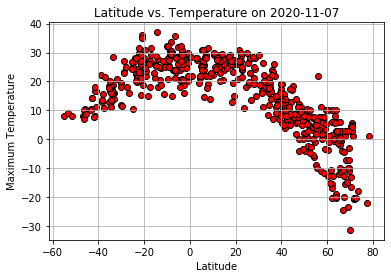

In [63]:
#Build Scatter Plot for Each Data Type
# Incorporate Other Graph Properties
from datetime import datetime
plt.scatter(weather_df["Latitude"],weather_df["Maximum Temperature"], facecolors="red", marker="o", edgecolor="black")
plt.title(f"Latitude vs. Temperature on {datetime.today().date()}")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.grid(True)

# Save Figure
#plt.savefig("./Data/City_Latitude_vs_Max_Temperature.png")

plt.show()

## Latitude vs. Humidity Plot

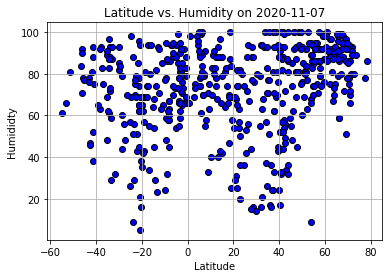

In [66]:
plt.scatter(weather_df["Latitude"],weather_df["Humidity"],facecolors="blue", marker="o", edgecolor="black")
plt.title(f"Latitude vs. Humidity on {datetime.today().date()}")
plt.xlabel("Latitude")
plt.ylabel("Humididty")
plt.grid(True)
plt.show()

## Latitude vs. Cloudiness Plot

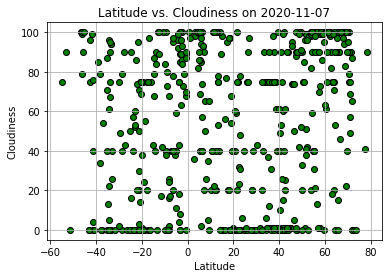

In [67]:
plt.scatter(weather_df["Latitude"],weather_df["Cloudiness"],facecolors="green", marker="o", edgecolor="black")
plt.title(f"Latitude vs. Cloudiness on {datetime.today().date()}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
plt.show()

## Latitude vs. Wind Speed Plot

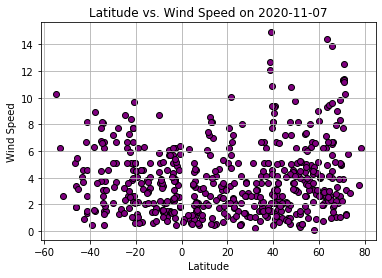

In [68]:
plt.scatter(weather_df["Latitude"],weather_df["Wind Speed"],facecolors="purple", marker="o", edgecolor="black")
plt.title(f"Latitude vs. Wind Speed on {datetime.today().date()}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)
plt.show()

## Linear Regression

In [106]:
def linear_reg(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

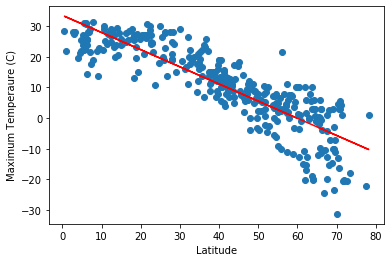

None


In [107]:
northern_hemisphere = weather_df.loc[weather_df["Latitude"]>0]
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Maximum Temperature"]
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperaure (C)")
print(linear_reg(x_values,y_values))


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

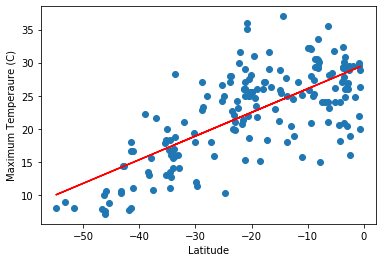

None


In [111]:
southern_hemisphere = weather_df.loc[weather_df["Latitude"]<0]
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Maximum Temperature"]
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperaure (C)")
print(linear_reg(x_values,y_values))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

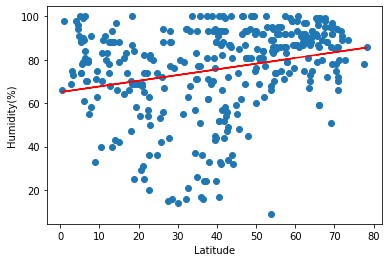

None


In [112]:
y_values = northern_hemisphere["Humidity"]
x_values =  northern_hemisphere["Latitude"] 
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
print(linear_reg(x_values,y_values))



####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

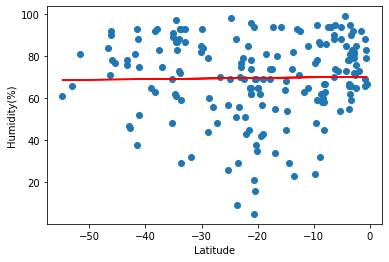

None


In [113]:
y_values = southern_hemisphere["Humidity"]
x_values =  southern_hemisphere["Latitude"] 
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
print(linear_reg(x_values,y_values))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
y_values = northern_hemisphere["Cloudiness"]
x_values =  northern_hemisphere["Latitude"] 
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
print(linear_reg(x_values,y_values))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

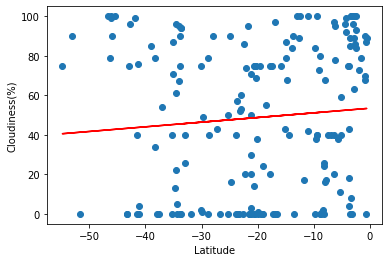

None


In [114]:
y_values = southern_hemisphere["Cloudiness"]
x_values = southern_hemisphere["Latitude"] 
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
print(linear_reg(x_values,y_values))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

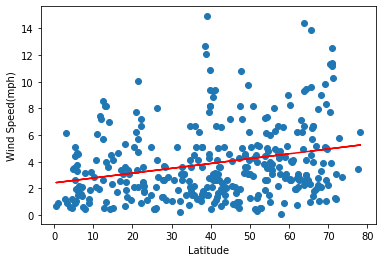

None


In [115]:
y_values = northern_hemisphere["Wind Speed"]
x_values = northern_hemisphere["Latitude"] 
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
print(linear_reg(x_values,y_values))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

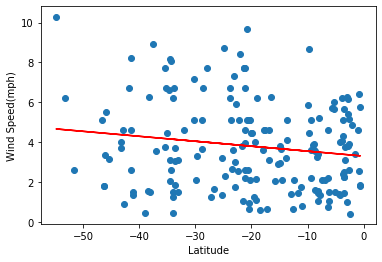

None


In [116]:
y_values = southern_hemisphere["Wind Speed"]
x_values = southern_hemisphere["Latitude"] 
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
print(linear_reg(x_values,y_values))